# Air Quality by Neighborhood

### By Peter Ju

Link to the dataset: [Allegheny County Particulate Matter 2.5](https://data.wprdc.org/dataset/particulate-matter-2-5)

Import Python modules

In [31]:
import geopandas as geopd
import pandas as pd

Read data

In [32]:
pm25 = pd.read_csv("Dpm25.csv")
pm25.head()

FileNotFoundError: [Errno 2] No such file or directory: 'pm25.csv'

As we can see, the above dataset contains information about the air quality in different places specified by the Census Tract number.

We want to show this on a neighborhood map eventually, so let us load the shapefile by geopandas.

In [3]:
neighborhoods = geopd.read_file("pittsburghpaneighborhoods-/Neighborhoods_.shp")
neighborhoods.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."


We can now create a DataFrame to store everything we have for the air quality index and the neighborhoods shapefile since we will not need every column in the two datasets.

In [4]:
neighborhood_pm25 = pd.DataFrame(columns = ["Neighborhood", "tractce10", "PM25"])
neighborhood_pm25["Neighborhood"] = neighborhoods["hood"]
neighborhood_pm25["tractce10"] = neighborhoods["tractce10"]

neighborhood_pm25[["PM25"]] = neighborhood_pm25[["PM25"]].astype(float)
neighborhood_pm25

,Neighborhood,tractce10,PM25
0,Point Breeze North,140500,NaN
1,Squirrel Hill North,140100,NaN
2,Garfield,101700,NaN
3,Bedford Dwellings,050900,NaN
4,Knoxville,300100,NaN
...,...,...,...
85,Regent Square,141000,NaN
86,Terrace Village,051100,NaN
87,Elliott,562600,NaN
88,South Side Flats,170200,NaN


Now let us iterate through ```pm25``` to fill in the ```NaN```s.

In [5]:
for ignored, row in pm25.iterrows():
    ct = row["CensusTract"]
    for index, each_neighborhood in neighborhood_pm25.iterrows():
        if str(each_neighborhood["tractce10"]) == "None":
            continue
        else:
            if float(str(each_neighborhood["tractce10"])) == float((str(ct))):
                if pd.isna(neighborhood_pm25.at[index, "PM25"]):
                    neighborhood_pm25.at[index, "PM25"] = row["PM25"]
            
neighborhood_pm25

,Neighborhood,tractce10,PM25
0,Point Breeze North,140500,12.280433
1,Squirrel Hill North,140100,12.285337
2,Garfield,101700,12.199422
3,Bedford Dwellings,050900,12.243351
4,Knoxville,300100,12.317734
...,...,...,...
85,Regent Square,141000,12.300740
86,Terrace Village,051100,12.285219
87,Elliott,562600,12.251616
88,South Side Flats,170200,12.298205


We can sort the DataFrame ascendingly since a smaller PM25 value indicates better air quality.

In [6]:
neighborhood_pm25 = neighborhood_pm25.sort_values("PM25", ascending=True)
neighborhood_pm25.head(10)

,Neighborhood,tractce10,PM25
78,Windgap,563000,12.157559
23,Fairywood,563000,12.157559
50,Chartiers City,563000,12.157559
84,Upper Lawrenceville,101100,12.157773
21,Lincoln-Lemington-Belmar,980000,12.158553
71,Stanton Heights,101800,12.159449
76,Summer Hill,261200,12.160112
13,Morningside,101400,12.162134
28,East Carnegie,562800,12.169079
7,Oakwood,562800,12.169079


The below bar graph shows the distribution of the PM 2.5 values among neighborhoods:

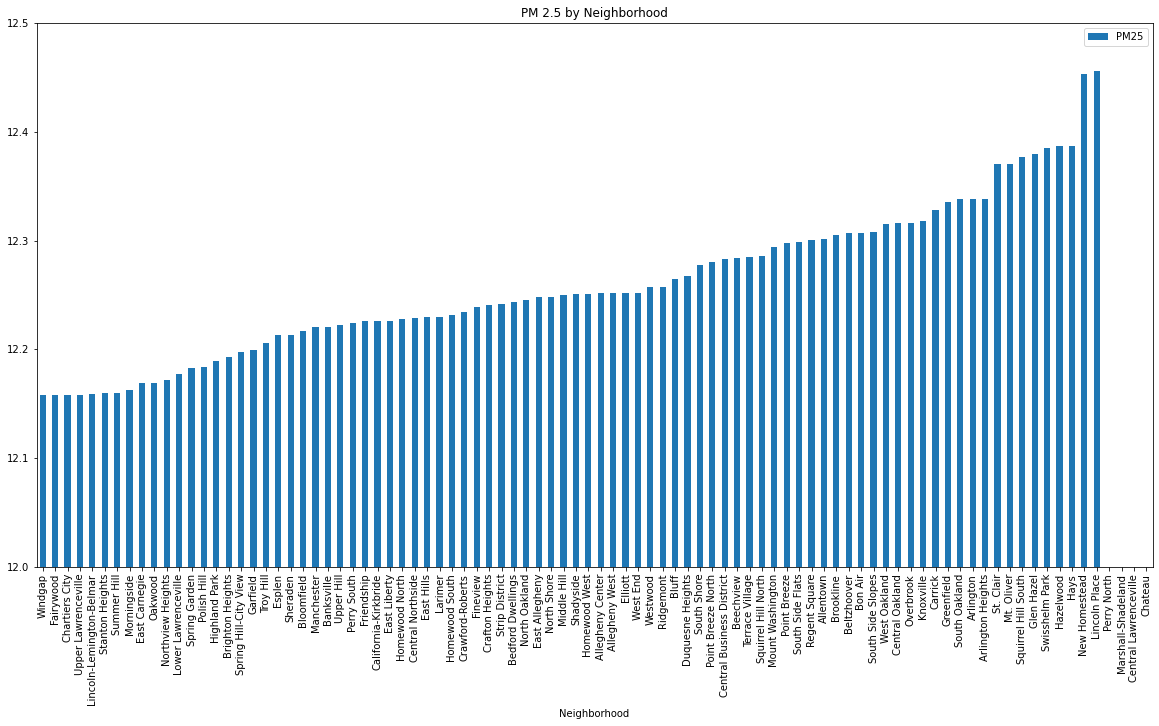

In [7]:
plot = neighborhood_pm25.plot(kind='bar', x="Neighborhood", y="PM25", title="PM 2.5 by Neighborhood", figsize=(20,10)).set_ylim([12,12.5])

Let us make a map to see how the PM2.5 in one neighborhood differs from another.

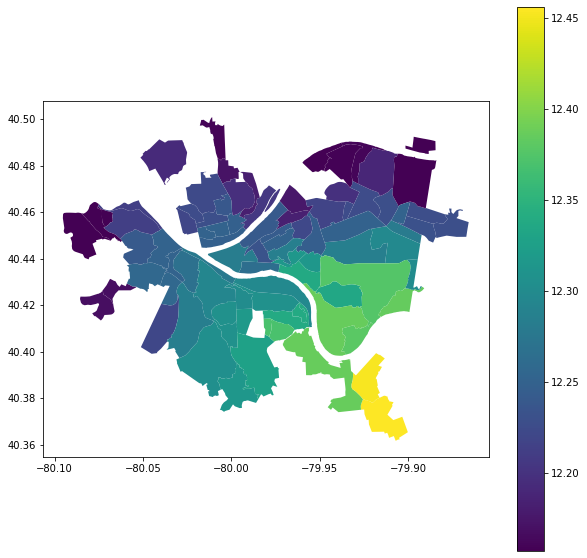

In [8]:
neighborhoods["PM25"] = neighborhood_pm25["PM25"]

neighborhoods.plot(column="PM25", legend=True, figsize=(10,10))

# Illegal Dump Sites by Neighborhood

### By Peter Ju

Link to the dataset:  [Allegheny County Illegal Dump Sites](hhttps://data.wprdc.org/dataset/allegheny-county-illegal-dump-sites)

Read data

In [22]:
dump = pd.read_csv("dump-site.csv")
dump.head()

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912


We want to do data preprocessing to convert certain columns to ```float``` type and eliminate ineffective rows.

In [23]:
dump = dump.loc[dump["estimated_tons"] != "Undetermined"]
dump = dump.loc[dump["estimated_tons"] != "Not Applicable"]
dump = dump[dump["estimated_tons"].notna()]
dump[["estimated_tons"]] = dump[["estimated_tons"]].astype(float)
dump[["latitude"]] = dump[["latitude"]].astype(float)
dump[["longitude"]] = dump[["longitude"]].astype(float)

The shapefile would be the same as the one we previously used. Let us load that in again.

In [24]:
neighborhoods = geopd.read_file("pittsburghpaneighborhoods-/Neighborhoods_.shp")
neighborhoods.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."


We can now create a DataFrame to store everything we want: the dump sites and the name of the neighborhoods, which is what we use in this scenario to assign dump amount to which neighborhood it is in.

In [25]:
neighborhood_dump = pd.DataFrame(columns = ["Neighborhood", "Amount"])
neighborhood_dump["Neighborhood"] = neighborhoods["hood"]

neighborhood_dump[["Amount"]] = 0
neighborhood_dump

,Neighborhood,Amount
0,Point Breeze North,0
1,Squirrel Hill North,0
2,Garfield,0
3,Bedford Dwellings,0
4,Knoxville,0
...,...,...
85,Regent Square,0
86,Terrace Village,0
87,Elliott,0
88,South Side Flats,0


Now iterate through the dataset:

In [26]:
for ignored, row in dump.iterrows():
    
    for index, neighborhood in neighborhood_dump.iterrows():
        if neighborhood["Neighborhood"] == row["Neighborhood"]:
            if neighborhood_dump.at[index, "Amount"] == 0:
                neighborhood_dump.at[index, "Amount"] = row["estimated_tons"]
            else:
                neighborhood_dump.at[index, "Amount"] = neighborhood_dump.at[index, "Amount"] + row["estimated_tons"]

neighborhood_dump

,Neighborhood,Amount
0,Point Breeze North,0.3
1,Squirrel Hill North,0.0
2,Garfield,19.4
3,Bedford Dwellings,1.0
4,Knoxville,9.5
...,...,...
85,Regent Square,0.0
86,Terrace Village,2.5
87,Elliott,7.3
88,South Side Flats,0.0


We can sort the DataFrame ascendingly since a smaller value indicates that the neighborhood has less illegal dump sites.

In [27]:
neighborhood_dump = neighborhood_dump.sort_values("Amount", ascending=True)
neighborhood_dump.head(20)

,Neighborhood,Amount
44,East Allegheny,0.0
34,Manchester,0.0
35,Marshall-Shadeland,0.0
41,Friendship,0.0
43,Central Business District,0.0
88,South Side Flats,0.0
45,Allegheny Center,0.0
48,South Side Slopes,0.0
19,Lower Lawrenceville,0.0
18,Arlington Heights,0.0


This does not give us much insight. So let us look at the rows at the end.

In [28]:
neighborhood_dump.tail(20)

,Neighborhood,Amount
67,Mt. Oliver,11.3
5,Homewood South,12.9
58,Esplen,15.0
20,Larimer,16.9
77,West Oakland,17.3
49,Arlington,17.5
55,East Hills,17.8
9,Duquesne Heights,19.0
2,Garfield,19.4
37,New Homestead,20.0


Below is a bargraph of the data we have.

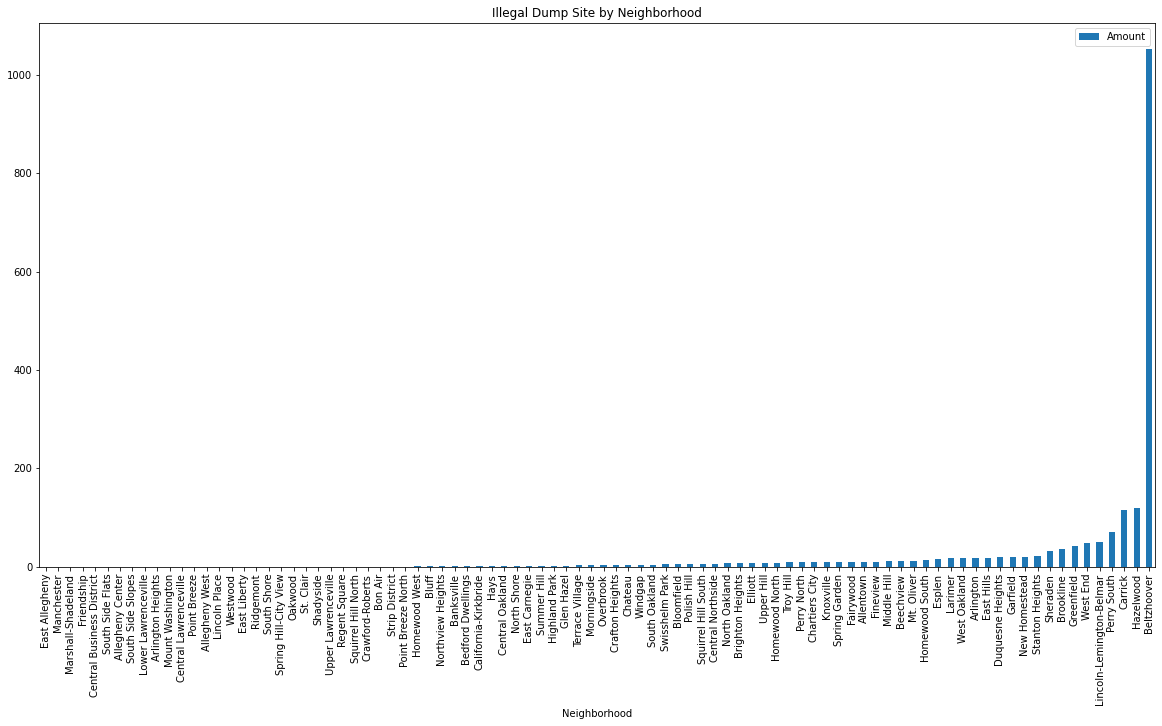

In [29]:
plot = neighborhood_dump.plot(kind='bar', x="Neighborhood", y="Amount", title="Illegal Dump Site by Neighborhood", figsize=(20,10))

Beltzhoover has a very interesting amount here. To put that in a map:

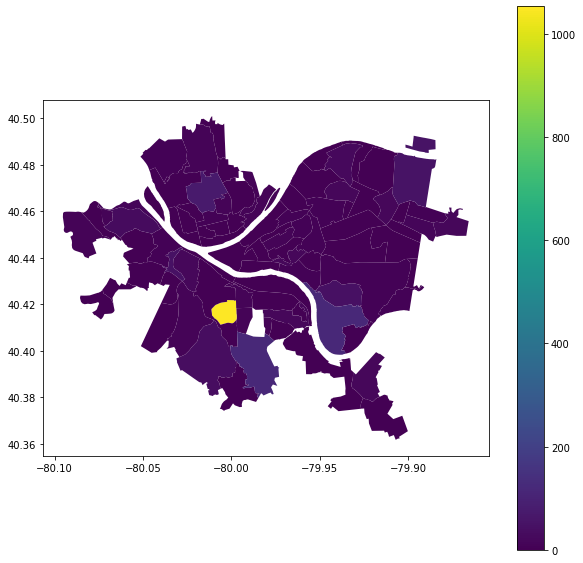

In [30]:
neighborhoods["Amount"] = neighborhood_dump["Amount"]

neighborhoods.plot(column="Amount", legend=True, figsize=(10,10))